# Analyzing CENSUS 2018 data from Brazil's Hospitals

In [1]:
#-- importing libraries
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.pyplot as plt

In [141]:
#-- open excel file
db = pd.read_excel('Lista Hospitais SUS 06-2018.xlsx', sheet_name='Plan1')
db.head()

,COMPETÊNCIA,UF,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,GESTÃO,TIPO DE UNIDADE,CNPJ,CNPJ MANTENEDORA,CONVÊNIO SUS?,LEITOS EXISTENTES,LEITOS SUS,QTD. PROFS,Nº INTERNAÇÕES
0,201805,AC,120001,ACRELANDIA,7245890,CEMEF,CENTRO MEDICO DA FAMILIA LTDA ME,RUA GERALDO BARBOSA - 296 - CENTRO,69945000,2062 - SOCIEDADE EMPRESARIA LIMITADA,M,04 - POLICLINICA,1.092371e+13,NaN,NÃO,-,-,2,-
1,201805,AC,120010,BRASILEIA,2001500,HOSPITAL RAIMUNDO CHAAR,SECRETARIA DE ESTADO DE SAUDE DO ACRE SESACRE,AV PREFEITO ROLANDO MOREIRA - 920 - CENTRO,69932000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,4.034526e+12,4.034526e+12,SIM,42,42,167,591
2,201805,AC,120020,CRUZEIRO DO SUL,2000172,SESACRE HOSPITAL DE DERMATOLOGIA SANITARIA,SECRETARIA DE ESTADO DE SAUDE,TRAVESSA HERNANDES AGRICOLA - 358 - TELEGRAFO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,4.034526e+12,4.034526e+12,SIM,20,20,38,31
3,201805,AC,120020,CRUZEIRO DO SUL,2000229,CLINICA SANTA MARIA,CLINICA SANTA MARIA,AV GETULIO VARGAS - 805 - CENTRO,69980000,3999 - ASSOCIACAO PRIVADA,E,04 - POLICLINICA,4.413820e+11,NaN,NÃO,-,-,1,-
4,201805,AC,120020,CRUZEIRO DO SUL,2000296,HOSPITAL DA MULHER E DA CRIANCA DO JURUA,SECRETARIA DE ESTADO DE SAUDE,AVENIDA LAURO MULLER - 0351 - CENTRO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,07 - HOSPITAL ESPECIALIZADO,4.034526e+12,4.034526e+12,SIM,68,46,309,1082


In [142]:
#-- analysing db structure
print('Number os rows = ' + str(db.shape[0]) + '\n' + 'Number of columns = ' + str(db.shape[1]))

Number os rows = 62174
Number of columns = 19


In [143]:
#-- verifying columns with missing values
db.isnull().sum().sort_values(ascending=False)/len(db)

CNPJ MANTENEDORA     0.856934
CNPJ                 0.124924
Nº INTERNAÇÕES       0.000000
ENDEREÇO             0.000000
UF                   0.000000
IBGE                 0.000000
MUNICÍPIO            0.000000
CNES                 0.000000
NOME FANTASIA        0.000000
RAZÃO SOCIAL         0.000000
NATUREZA JURÍDICA    0.000000
CEP                  0.000000
QTD. PROFS           0.000000
GESTÃO               0.000000
TIPO DE UNIDADE      0.000000
CONVÊNIO SUS?        0.000000
LEITOS EXISTENTES    0.000000
LEITOS SUS           0.000000
COMPETÊNCIA          0.000000
dtype: float64

> `CNPJ MANTENEDORA` and `CNPJ` columns have missing values, so I'll drop them

In [144]:
#-- droping both columns with missing values
db.drop(['CNPJ MANTENEDORA', 'CNPJ'], axis=1, inplace=True)

In [145]:
#-- priting head from the new db
db.head()

,COMPETÊNCIA,UF,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,GESTÃO,TIPO DE UNIDADE,CONVÊNIO SUS?,LEITOS EXISTENTES,LEITOS SUS,QTD. PROFS,Nº INTERNAÇÕES
0,201805,AC,120001,ACRELANDIA,7245890,CEMEF,CENTRO MEDICO DA FAMILIA LTDA ME,RUA GERALDO BARBOSA - 296 - CENTRO,69945000,2062 - SOCIEDADE EMPRESARIA LIMITADA,M,04 - POLICLINICA,NÃO,-,-,2,-
1,201805,AC,120010,BRASILEIA,2001500,HOSPITAL RAIMUNDO CHAAR,SECRETARIA DE ESTADO DE SAUDE DO ACRE SESACRE,AV PREFEITO ROLANDO MOREIRA - 920 - CENTRO,69932000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,SIM,42,42,167,591
2,201805,AC,120020,CRUZEIRO DO SUL,2000172,SESACRE HOSPITAL DE DERMATOLOGIA SANITARIA,SECRETARIA DE ESTADO DE SAUDE,TRAVESSA HERNANDES AGRICOLA - 358 - TELEGRAFO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,05 - HOSPITAL GERAL,SIM,20,20,38,31
3,201805,AC,120020,CRUZEIRO DO SUL,2000229,CLINICA SANTA MARIA,CLINICA SANTA MARIA,AV GETULIO VARGAS - 805 - CENTRO,69980000,3999 - ASSOCIACAO PRIVADA,E,04 - POLICLINICA,NÃO,-,-,1,-
4,201805,AC,120020,CRUZEIRO DO SUL,2000296,HOSPITAL DA MULHER E DA CRIANCA DO JURUA,SECRETARIA DE ESTADO DE SAUDE,AVENIDA LAURO MULLER - 0351 - CENTRO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,E,07 - HOSPITAL ESPECIALIZADO,SIM,68,46,309,1082


> Let's analyse the columns to see which are interesting to plot in a graph

In [146]:
#-- priting business type
db['GESTÃO'].value_counts()

M    54585
E     5316
D     2273
Name: GESTÃO, dtype: int64

In [147]:
#-- printing hospital type
db['TIPO DE UNIDADE'].value_counts()

36 - CLINICA/CENTRO DE ESPECIALIDADE    48287
04 - POLICLINICA                         7731
05 - HOSPITAL GERAL                      5136
07 - HOSPITAL ESPECIALIZADO              1020
Name: TIPO DE UNIDADE, dtype: int64

In [148]:
#-- printing government agreement
db['CONVÊNIO SUS?'].value_counts()

NÃO    45237
SIM    16937
Name: CONVÊNIO SUS?, dtype: int64

In [149]:
#-- printing number of beds
db['LEITOS EXISTENTES'].value_counts()

-       55731
30        155
20        149
50        143
1         114
21        104
16        102
32         92
12         91
2          89
40         89
19         89
36         88
26         87
15         85
31         84
25         83
18         83
17         82
14         79
10         78
35         78
28         78
49         70
24         70
22         69
33         68
34         67
23         66
52         63
        ...  
377         1
416         1
415         1
413         1
412         1
988         1
406         1
404         1
281         1
397         1
1543        1
392         1
385         1
380         1
188         1
338         1
374         1
373         1
371         1
215         1
369         1
368         1
362         1
360         1
356         1
344         1
195         1
340         1
339         1
1070        1
Name: LEITOS EXISTENTES, Length: 427, dtype: int64

In [150]:
#-- printing number os Public Agreement's Bed
db['LEITOS SUS'].value_counts()

-       55731
0        1804
20        122
30        114
16         93
25         88
31         85
50         84
32         83
21         82
26         81
19         77
18         76
17         73
24         70
28         69
22         68
33         64
40         63
15         63
35         61
36         61
1          61
34         59
23         58
14         57
12         57
13         56
45         51
29         50
        ...  
294         1
195         1
337         1
359         1
353         1
352         1
350         1
346         1
224         1
344         1
343         1
342         1
341         1
340         1
338         1
335         1
296         1
333         1
180         1
322         1
165         1
318         1
317         1
184         1
310         1
1075        1
1466        1
303         1
297         1
1190        1
Name: LEITOS SUS, Length: 374, dtype: int64

In [151]:
#-- printing the number o professionals
db['QTD. PROFS'].value_counts()

1       16064
2       10552
3        5819
4        3887
5        2832
6        2174
7        1780
8        1496
9        1183
10       1129
11        901
12        821
13        705
15        583
14        565
16        478
17        463
18        390
19        370
20        338
21        334
22        294
23        292
24        263
25        257
27        232
26        231
29        194
28        192
32        186
        ...  
802         1
882         1
851         1
1273        1
1269        1
320         1
1266        1
879         1
878         1
877         1
868         1
867         1
861         1
859         1
855         1
332         1
353         1
849         1
847         1
834         1
1262        1
829         1
827         1
824         1
819         1
815         1
813         1
808         1
351         1
273         1
Name: QTD. PROFS, Length: 1044, dtype: int64

In [152]:
#-- printing the number os hospitalizations
db['Nº INTERNAÇÕES'].value_counts()

-       58237
44         16
58         14
39         13
57         13
134        12
86         12
1          11
77         11
67         11
68         11
15         11
78         11
5          11
3          11
31         11
28         10
80         10
100        10
76         10
72         10
144        10
152        10
160        10
203        10
278        10
133        10
24         10
81          9
137         9
        ...  
1667        1
1669        1
1671        1
1675        1
1678        1
1593        1
1591        1
1523        1
1549        1
1526        1
1530        1
1534        1
1536        1
1537        1
1538        1
1544        1
1547        1
1548        1
1551        1
1587        1
1552        1
1557        1
1563        1
1565        1
1569        1
1572        1
1574        1
1575        1
1583        1
1009        1
Name: Nº INTERNAÇÕES, Length: 1724, dtype: int64

In [153]:
#-- grouping the dataset by State
db.groupby(['UF']).count()

,COMPETÊNCIA,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,GESTÃO,TIPO DE UNIDADE,CONVÊNIO SUS?,LEITOS EXISTENTES,LEITOS SUS,QTD. PROFS,Nº INTERNAÇÕES
UF,,,,,,,,,,,,,,,,
AC,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
AL,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577,577
AM,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348,348
AP,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
BA,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707,4707
CE,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803,2803
DF,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475,1475
ES,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980
GO,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307,2307


In [154]:
#-- filtering the dataset by only hospital with Puclib Agreement
db_s = db[db['CONVÊNIO SUS?'] == 'SIM']
db_sus_s = db_s.groupby(['UF'])['CONVÊNIO SUS?'].count()
db_sus_s = pd.DataFrame(db_sus_s)
db_sus_s['UF2'] = db_sus_s.index

In [155]:
#-- printing the head of this new dataset
db_sus_s.head()

,CONVÊNIO SUS?,UF2
UF,,
AC,26,AC
AL,269,AL
AM,188,AM
AP,24,AP
BA,1423,BA


In [156]:
#-- ordering the data by values
db_sus_s.sort_values(['CONVÊNIO SUS?'], ascending=False, inplace=True)

In [157]:
#-- setting the size of plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, '#')

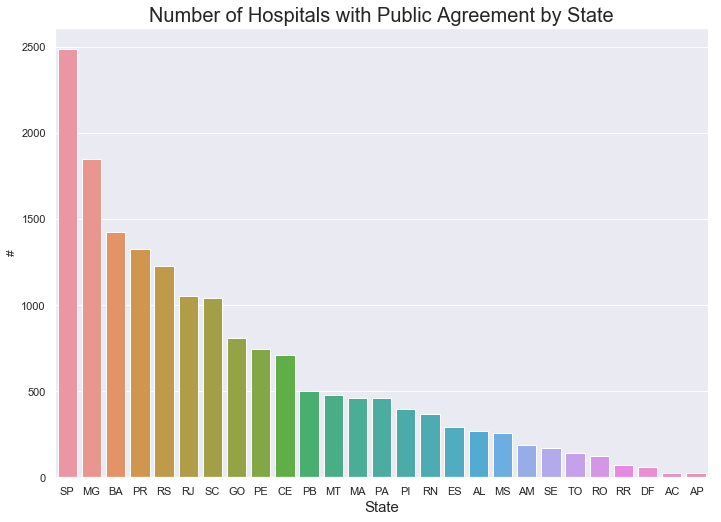

In [158]:
#-- plotting the hospitals with Public Agreement by State
sns.barplot(x=db_sus_s['UF2'], y=db_sus_s['CONVÊNIO SUS?'])
plt.title('Number of Hospitals with Public Agreement by State', loc='center', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('#')

In [159]:
#-- filtering the dataset by only hospital without Puclib Agreement
db_n = db[db['CONVÊNIO SUS?'] == 'NÃO']
db_sus_n = db_n.groupby(['UF'])['CONVÊNIO SUS?'].count()
db_sus_n = pd.DataFrame(db_sus_n)
db_sus_n['UF2'] = db_sus_n.index

In [160]:
#-- ordering the data by values
db_sus_n.sort_values(['CONVÊNIO SUS?'], ascending=False, inplace=True)
db_sus_n.head()

,CONVÊNIO SUS?,UF2
UF,,
SP,11220,SP
MG,5339,MG
RJ,4185,RJ
BA,3284,BA
RS,2568,RS


Text(0, 0.5, '#')

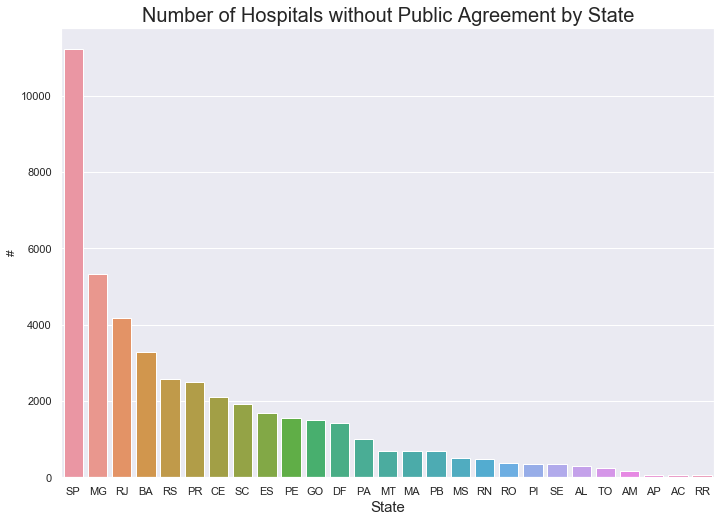

In [161]:
#-- plotting the hospitals without Public Agreement by State
sns.barplot(x=db_sus_n['UF2'], y=db_sus_n['CONVÊNIO SUS?'])
plt.title('Number of Hospitals without Public Agreement by State', loc='center', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('#')

In [162]:
#-- ordering dataset by the name of States
db_sus_s.sort_values(['UF2'], ascending=False, inplace=True)
db_sus_n.sort_values(['UF2'], ascending=False, inplace=True)

In [163]:
#-- calculating the proportion between hospitals without/with Public Agreement
prop = db_sus_n.iloc[:,0] / db_sus_s.iloc[:,0]

In [164]:
#-- making a dataframe
prop = pd.DataFrame(prop)

In [165]:
#-- creating a new column
prop['UF2'] = prop.index

In [166]:
#-- ordering the dataset by the number os states with more hospitals without Public Agreement proportional
prop.sort_values(['CONVÊNIO SUS?'], ascending=False, inplace=True)

Text(0, 0.5, '#')

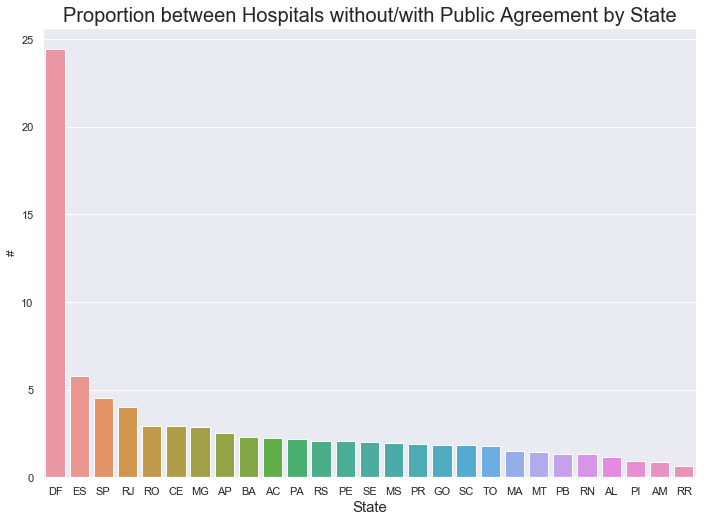

In [167]:
#-- plotting the States with more hospitals without Public Agreement
sns.barplot(x=prop['UF2'], y=prop['CONVÊNIO SUS?'])
plt.title('Proportion between Hospitals without/with Public Agreement by State', loc='center', fontsize=20)
plt.xlabel('State', fontsize=15)
plt.ylabel('#')

# Cluster Analysis

>To keep moving with this analysis, next step could be a cluster analysis or even a correlation between population and GDP from those States...

In [168]:
#-- merging GDP data with the cities
prop.head()

,CONVÊNIO SUS?,UF2
UF,,
DF,24.431034,DF
ES,5.757679,ES
SP,4.513274,SP
RJ,3.985714,RJ
RO,2.943089,RO


In [169]:
#-- printing the head db dataset
db.head().T

,0,1,2,3,4
COMPETÊNCIA,201805,201805,201805,201805,201805
UF,AC,AC,AC,AC,AC
IBGE,120001,120010,120020,120020,120020
MUNICÍPIO,ACRELANDIA,BRASILEIA,CRUZEIRO DO SUL,CRUZEIRO DO SUL,CRUZEIRO DO SUL
CNES,7245890,2001500,2000172,2000229,2000296
NOME FANTASIA,CEMEF,HOSPITAL RAIMUNDO CHAAR,SESACRE HOSPITAL DE DERMATOLOGIA SANITARIA,CLINICA SANTA MARIA,HOSPITAL DA MULHER E DA CRIANCA DO JURUA
RAZÃO SOCIAL,CENTRO MEDICO DA FAMILIA LTDA ME,SECRETARIA DE ESTADO DE SAUDE DO ACRE SESACRE,SECRETARIA DE ESTADO DE SAUDE,CLINICA SANTA MARIA,SECRETARIA DE ESTADO DE SAUDE
ENDEREÇO,RUA GERALDO BARBOSA - 296 - CENTRO,AV PREFEITO ROLANDO MOREIRA - 920 - CENTRO,TRAVESSA HERNANDES AGRICOLA - 358 - TELEGRAFO,AV GETULIO VARGAS - 805 - CENTRO,AVENIDA LAURO MULLER - 0351 - CENTRO
CEP,69945000,69932000,69980000,69980000,69980000
NATUREZA JURÍDICA,2062 - SOCIEDADE EMPRESARIA LIMITADA,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,3999 - ASSOCIACAO PRIVADA,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...


In [170]:
#-- join UF and City Name (BRazil has same name city in different States)
db['Concat'] = db['UF'] + db['MUNICÍPIO']
db['Concat'].head()

0         ACACRELANDIA
1          ACBRASILEIA
2    ACCRUZEIRO DO SUL
3    ACCRUZEIRO DO SUL
4    ACCRUZEIRO DO SUL
Name: Concat, dtype: object

In [171]:
#-- counting cities name + State
db['Concat'].value_counts()

SPSAO PAULO                     4367
RJRIO DE JANEIRO                2229
CEFORTALEZA                     1717
MGBELO HORIZONTE                1580
BASALVADOR                      1579
DFBRASILIA                      1475
PERECIFE                         968
GOGOIANIA                        901
PRCURITIBA                       860
RSPORTO ALEGRE                   748
ESVITORIA                        635
SPRIBEIRAO PRETO                 631
PABELEM                          568
PBJOAO PESSOA                    475
MASAO LUIS                       447
SCFLORIANOPOLIS                  395
MGUBERLANDIA                     380
SPCAMPINAS                       361
BAFEIRA DE SANTANA               349
RNNATAL                          346
MTCUIABA                         345
ALMACEIO                         329
SPSAO BERNARDO DO CAMPO          328
SPSANTO ANDRE                    323
MGJUIZ DE FORA                   320
SPPIRACICABA                     299
PITERESINA                       299
S

In [172]:
#-- open PIB file
pib = pd.read_excel('PIB dos Municípios - base de dados 2010-2015.xls')

In [173]:
#-- printing head
pib.head().T

,0,1,2,3,4
Ano,2010,2010,2010,2010,2010
Código da Unidade da Federação,11,11,11,11,11
Nome da Unidade da Federação,Rondônia,Rondônia,Rondônia,Rondônia,Rondônia
Código do Município,1100015,1100023,1100031,1100049,1100056
Nome do Município,Alta Floresta D'Oeste,Ariquemes,Cabixi,Cacoal,Cerejeiras
Região Metropolitana,NaN,NaN,NaN,NaN,NaN
Código da Mesorregião,1102,1102,1102,1102,1102
Nome da Mesorregião,Leste Rondoniense,Leste Rondoniense,Leste Rondoniense,Leste Rondoniense,Leste Rondoniense
Código da Microrregião,11006,11003,11008,11006,11008
Nome da Microrregião,Cacoal,Ariquemes,Colorado do Oeste,Cacoal,Colorado do Oeste


In [174]:
#-- counting states
pib['Nome da Unidade da Federação'].value_counts()

Minas Gerais           5118
São Paulo              3870
Rio Grande do Sul      2979
Bahia                  2502
Paraná                 2394
Santa Catarina         1764
Goiás                  1476
Piauí                  1344
Paraíba                1338
Maranhão               1302
Pernambuco             1110
Ceará                  1104
Rio Grande do Norte    1002
Pará                    861
Mato Grosso             846
Tocantins               834
Alagoas                 612
Rio de Janeiro          552
Mato Grosso do Sul      471
Espírito Santo          468
Sergipe                 450
Amazonas                372
Rondônia                312
Acre                    132
Amapá                    96
Roraima                  90
Distrito Federal          6
Name: Nome da Unidade da Federação, dtype: int64

In [175]:
#-- creating UF column
pib.loc[pib['Nome da Unidade da Federação'] == 'Minas Gerais', 'UF'] = 'MG'
pib.loc[pib['Nome da Unidade da Federação'] == 'São Paulo', 'UF'] = 'SP'
pib.loc[pib['Nome da Unidade da Federação'] == 'Rio Grande do Sul', 'UF'] = 'RS'
pib.loc[pib['Nome da Unidade da Federação'] == 'Bahia', 'UF'] = 'BA'
pib.loc[pib['Nome da Unidade da Federação'] == 'Paraná', 'UF'] = 'PR'
pib.loc[pib['Nome da Unidade da Federação'] == 'Santa Catarina', 'UF'] = 'SC'
pib.loc[pib['Nome da Unidade da Federação'] == 'Goiás', 'UF'] = 'GO'
pib.loc[pib['Nome da Unidade da Federação'] == 'Piauí', 'UF'] = 'PI'
pib.loc[pib['Nome da Unidade da Federação'] == 'Paraíba', 'UF'] = 'PB'
pib.loc[pib['Nome da Unidade da Federação'] == 'Maranhão', 'UF'] = 'MA'
pib.loc[pib['Nome da Unidade da Federação'] == 'Pernambuco', 'UF'] = 'PE'
pib.loc[pib['Nome da Unidade da Federação'] == 'Ceará', 'UF'] = 'CE'
pib.loc[pib['Nome da Unidade da Federação'] == 'Rio Grande do Norte', 'UF'] = 'RN'
pib.loc[pib['Nome da Unidade da Federação'] == 'Pará', 'UF'] = 'PA'
pib.loc[pib['Nome da Unidade da Federação'] == 'Mato Grosso', 'UF'] = 'MT'
pib.loc[pib['Nome da Unidade da Federação'] == 'Tocantins', 'UF'] = 'TO'
pib.loc[pib['Nome da Unidade da Federação'] == 'Alagoas', 'UF'] = 'AL'
pib.loc[pib['Nome da Unidade da Federação'] == 'Rio de Janeiro', 'UF'] = 'RJ'
pib.loc[pib['Nome da Unidade da Federação'] == 'Mato Grosso do Sul', 'UF'] = 'MS'
pib.loc[pib['Nome da Unidade da Federação'] == 'Espírito Santo', 'UF'] = 'ES'
pib.loc[pib['Nome da Unidade da Federação'] == 'Sergipe', 'UF'] = 'SE'
pib.loc[pib['Nome da Unidade da Federação'] == 'Amazonas', 'UF'] = 'AM'
pib.loc[pib['Nome da Unidade da Federação'] == 'Rondônia', 'UF'] = 'RO'
pib.loc[pib['Nome da Unidade da Federação'] == 'Acre', 'UF'] = 'AC'
pib.loc[pib['Nome da Unidade da Federação'] == 'Amapá', 'UF'] = 'AP'
pib.loc[pib['Nome da Unidade da Federação'] == 'Roraima', 'UF'] = 'RR'
pib.loc[pib['Nome da Unidade da Federação'] == 'Distrito Federal', 'UF'] = 'DF'

In [176]:
#-- counting states
pib['UF'].value_counts()

MG    5118
SP    3870
RS    2979
BA    2502
PR    2394
SC    1764
GO    1476
PI    1344
PB    1338
MA    1302
PE    1110
CE    1104
RN    1002
PA     861
MT     846
TO     834
AL     612
RJ     552
MS     471
ES     468
SE     450
AM     372
RO     312
AC     132
AP      96
RR      90
DF       6
Name: UF, dtype: int64

In [177]:
#-- selecting the data from 2015
pib_2015 = pib[pib['Ano'] == 2015].copy()

In [178]:
#-- printing the shape
pib_2015.shape

(5570, 23)

In [179]:
#-- printing the head
pib_2015.head().T

,27835,27836,27837,27838,27839
Ano,2015,2015,2015,2015,2015
Código da Unidade da Federação,11,11,11,11,11
Nome da Unidade da Federação,Rondônia,Rondônia,Rondônia,Rondônia,Rondônia
Código do Município,1100015,1100023,1100031,1100049,1100056
Nome do Município,Alta Floresta D'Oeste,Ariquemes,Cabixi,Cacoal,Cerejeiras
Região Metropolitana,NaN,NaN,NaN,NaN,NaN
Código da Mesorregião,1102,1102,1102,1102,1102
Nome da Mesorregião,Leste Rondoniense,Leste Rondoniense,Leste Rondoniense,Leste Rondoniense,Leste Rondoniense
Código da Microrregião,11006,11003,11008,11006,11008
Nome da Microrregião,Cacoal,Ariquemes,Colorado do Oeste,Cacoal,Colorado do Oeste


In [180]:
#-- verifying if all data is from 2015
pib_2015['Ano'].value_counts()

2015    5570
Name: Ano, dtype: int64

In [181]:
#-- removing special characters
import re
pib_2015['Nome_No'] = pib_2015['Nome do Município'].map(lambda x: re.sub('[áãÁÃâÂ]','a', x))
pib_2015['Nome_No'] = pib_2015['Nome_No'].map(lambda x: re.sub('[éêÉÊ]','e', x))
pib_2015['Nome_No'] = pib_2015['Nome_No'].map(lambda x: re.sub('[óÓôÔõÕ]','o', x))
pib_2015['Nome_No'] = pib_2015['Nome_No'].map(lambda x: re.sub('[íÍ]','i', x))
pib_2015['Nome_No'] = pib_2015['Nome_No'].map(lambda x: re.sub('[úÚ]','u', x))
pib_2015['Nome_No'] = pib_2015['Nome_No'].map(lambda x: re.sub('[çÇ]','c', x))

In [182]:
#-- checking with the cities name changes took place
pib_2015['Nome_No'].value_counts()

Bom Jesus                   5
Sao Domingos                5
Vera Cruz                   4
Santa Luzia                 4
Santa Ines                  4
Santa Helena                4
Planalto                    4
Sao Francisco               4
Bonito                      4
Bom Sucesso                 3
Belem                       3
Mundo Novo                  3
Itambe                      3
Jussara                     3
Triunfo                     3
Vicosa                      3
Cantagalo                   3
Bom Jardim                  3
Cruzeiro do Sul             3
Novo Horizonte              3
Boa Esperanca               3
agua Branca                 3
Cachoeirinha                3
Santa Terezinha             3
Alto Alegre                 3
Nova Olinda                 3
Santa Cruz                  3
Ouro Branco                 3
Presidente Juscelino        2
Caracol                     2
                           ..
Urucuia                     1
Barra de Sao Francisco      1
Nova Palme

In [183]:
#-- join cities name with State
pib_2015['Concat'] = pib_2015['UF'] + pib_2015['Nome_No']
pib_2015['Concat'] = pib_2015['Concat'].str.upper()
pib_2015['Concat'].head()

27835    ROALTA FLORESTA D'OESTE
27836                ROARIQUEMES
27837                   ROCABIXI
27838                   ROCACOAL
27839               ROCEREJEIRAS
Name: Concat, dtype: object

In [184]:
#-- counting the concat
pib_2015[pib_2015['UF'] == 'RS'].tail(150)

,Ano,Código da Unidade da Federação,Nome da Unidade da Federação,Código do Município,Nome do Município,Região Metropolitana,Código da Mesorregião,Nome da Mesorregião,Código da Microrregião,Nome da Microrregião,...,"Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1.000)","Produto Interno Bruto, a preços correntes (R$ 1.000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,UF,Nome_No,Concat
32788,2015,43,Rio Grande do Sul,4315909,Rodeio Bonito,NaN,4301,Noroeste Rio-grandense,43003,Frederico Westphalen,...,13123.681,143010.341,5955,24015.17,Demais serviços,"Administração, defesa, educação e saúde públic...",Comércio e reparação de veículos automotores e...,RS,Rodeio Bonito,RSRODEIO BONITO
32789,2015,43,Rio Grande do Sul,4315958,Rolador,NaN,4301,Noroeste Rio-grandense,43007,Santo Ângelo,...,2200.360,75005.925,2542,29506.66,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços,RS,Rolador,RSROLADOR
32790,2015,43,Rio Grande do Sul,4316006,Rolante,RM Porto Alegre,4305,Metropolitana de Porto Alegre,43024,Gramado-Canela,...,56865.406,514156.501,20712,24824.09,Demais serviços,Indústrias de transformação,"Administração, defesa, educação e saúde públic...",RS,Rolante,RSROLANTE
32791,2015,43,Rio Grande do Sul,4316105,Ronda Alta,NaN,4301,Noroeste Rio-grandense,43010,Passo Fundo,...,16575.468,261858.182,10655,24576.08,Demais serviços,"Agricultura, inclusive apoio à agricultura e a...",Comércio e reparação de veículos automotores e...,RS,Ronda Alta,RSRONDA ALTA
32792,2015,43,Rio Grande do Sul,4316204,Rondinha,NaN,4301,Noroeste Rio-grandense,43003,Frederico Westphalen,...,7914.209,163700.100,5544,29527.44,"Agricultura, inclusive apoio à agricultura e a...","Pecuária, inclusive apoio à pecuária",Demais serviços,RS,Rondinha,RSRONDINHA
32793,2015,43,Rio Grande do Sul,4316303,Roque Gonzales,NaN,4301,Noroeste Rio-grandense,43006,Cerro Largo,...,5353.009,572688.184,7289,78568.83,"Eletricidade e gás, água, esgoto, atividades d...","Administração, defesa, educação e saúde públic...",Demais serviços,RS,Roque Gonzales,RSROQUE GONZALES
32794,2015,43,Rio Grande do Sul,4316402,Rosário do Sul,NaN,4306,Sudoeste Rio-grandense,43030,Campanha Central,...,52344.913,847221.050,40773,20778.97,Demais serviços,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...",RS,Rosario do Sul,RSROSARIO DO SUL
32795,2015,43,Rio Grande do Sul,4316428,Sagrada Família,NaN,4301,Noroeste Rio-grandense,43009,Carazinho,...,2168.904,54415.442,2676,20334.62,"Agricultura, inclusive apoio à agricultura e a...","Administração, defesa, educação e saúde públic...",Demais serviços,RS,Sagrada Familia,RSSAGRADA FAMILIA
32796,2015,43,Rio Grande do Sul,4316436,Saldanha Marinho,NaN,4301,Noroeste Rio-grandense,43011,Cruz Alta,...,7697.527,119212.502,2876,41450.80,"Agricultura, inclusive apoio à agricultura e a...",Demais serviços,Comércio e reparação de veículos automotores e...,RS,Saldanha Marinho,RSSALDANHA MARINHO
32797,2015,43,Rio Grande do Sul,4316451,Salto do Jacuí,NaN,4301,Noroeste Rio-grandense,43011,Cruz Alta,...,15095.219,470993.180,12429,37894.70,"Eletricidade e gás, água, esgoto, atividades d...",Demais serviços,"Agricultura, inclusive apoio à agricultura e a...",RS,Salto do Jacui,RSSALTO DO JACUI


In [196]:
#-- modifying some cities names
db.loc[db['Concat'] == 'CEITAPAGE', 'Concat'] = 'CEITAPAJE'
db.loc[db['Concat'] == 'MGBRASOPOLIS', 'Concat'] = 'MGBRAZOPOLIS'
db.loc[db['Concat'] == 'MTPOXOREO', 'Concat'] = 'MTPOXOREU'
db.loc[db['Concat'] == 'PAELDORADO DOS CARAJAS', 'Concat'] = 'PAELDORADO DO CARAJAS'
db.loc[db['Concat'] == 'PASANTA ISABEL DO PARA', 'Concat'] = 'PASANTA IZABEL DO PARA'
db.loc[db['Concat'] == 'PBSERIDO', 'Concat'] = 'PBSAO VICENTE DO SERIDO'
db.loc[db['Concat'] == 'PEBELEM DE SAO FRANCISCO', 'Concat'] = 'PEBELEM DO SAO FRANCISCO'
db.loc[db['Concat'] == 'PELAGOA DO ITAENGA', 'Concat'] = 'PELAGOA DE ITAENGA'
db.loc[db['Concat'] == 'RJPARATI', 'Concat'] = 'RJPARATY'
db.loc[db['Concat'] == 'RJTRAJANO DE MORAIS', 'Concat'] = 'RJTRAJANO DE MORAES'
db.loc[db['Concat'] == 'RSSANTANA DO LIVRAMENTO', 'Concat'] = "RSSANT'ANA DO LIVRAMENTO"
db.loc[db['Concat'] == 'SPMOJI MIRIM', 'Concat'] = 'SPMOGI MIRIM'

In [197]:
#-- merging the database db and pib_2015
db_pib = pd.merge(left=db, right=pib_2015, left_on='Concat', right_on='Concat', how='left')

In [198]:
#-- printing the head
db_pib.head()

,COMPETÊNCIA,UF_x,IBGE,MUNICÍPIO,CNES,NOME FANTASIA,RAZÃO SOCIAL,ENDEREÇO,CEP,NATUREZA JURÍDICA,...,"Valor adicionado bruto total, a preços correntes (R$ 1.000)","Impostos, líquidos de subsídios, sobre produtos, a preços correntes (R$ 1.000)","Produto Interno Bruto, a preços correntes (R$ 1.000)",População (Nº de habitantes),"Produto Interno Bruto per capita (R$ 1,00)",Atividade com maior valor adicionado bruto,Atividade com segundo maior valor adicionado bruto,Atividade com terceiro maior valor adicionado bruto,UF_y,Nome_No
0,201805,AC,120001,ACRELANDIA,7245890,CEMEF,CENTRO MEDICO DA FAMILIA LTDA ME,RUA GERALDO BARBOSA - 296 - CENTRO,69945000,2062 - SOCIEDADE EMPRESARIA LIMITADA,...,206314.513,5667.070,211981.584,13869,15284.56,"Administração, defesa, educação e saúde públic...","Agricultura, inclusive apoio à agricultura e a...","Pecuária, inclusive apoio à pecuária",AC,Acrelandia
1,201805,AC,120010,BRASILEIA,2001500,HOSPITAL RAIMUNDO CHAAR,SECRETARIA DE ESTADO DE SAUDE DO ACRE SESACRE,AV PREFEITO ROLANDO MOREIRA - 920 - CENTRO,69932000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,...,362335.766,23524.531,385860.297,23849,16179.31,"Administração, defesa, educação e saúde públic...",Demais serviços,Indústrias de transformação,AC,Brasileia
2,201805,AC,120020,CRUZEIRO DO SUL,2000172,SESACRE HOSPITAL DE DERMATOLOGIA SANITARIA,SECRETARIA DE ESTADO DE SAUDE,TRAVESSA HERNANDES AGRICOLA - 358 - TELEGRAFO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,...,991563.029,70941.680,1062504.708,81519,13033.83,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...,AC,Cruzeiro do Sul
3,201805,AC,120020,CRUZEIRO DO SUL,2000229,CLINICA SANTA MARIA,CLINICA SANTA MARIA,AV GETULIO VARGAS - 805 - CENTRO,69980000,3999 - ASSOCIACAO PRIVADA,...,991563.029,70941.680,1062504.708,81519,13033.83,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...,AC,Cruzeiro do Sul
4,201805,AC,120020,CRUZEIRO DO SUL,2000296,HOSPITAL DA MULHER E DA CRIANCA DO JURUA,SECRETARIA DE ESTADO DE SAUDE,AVENIDA LAURO MULLER - 0351 - CENTRO,69980000,1023 - ORGAO PUBLICO DO PODER EXECUTIVO ESTADU...,...,991563.029,70941.680,1062504.708,81519,13033.83,"Administração, defesa, educação e saúde públic...",Demais serviços,Comércio e reparação de veículos automotores e...,AC,Cruzeiro do Sul


In [199]:
#-- verifying missing values
db_pib.isnull().sum()

COMPETÊNCIA                                                                                                                                                 0
UF_x                                                                                                                                                        0
IBGE                                                                                                                                                        0
MUNICÍPIO                                                                                                                                                   0
CNES                                                                                                                                                        0
NOME FANTASIA                                                                                                                                               0
RAZÃO SOCIAL                                        

In [200]:
#-- identifying cities with wrong names
pib_2015_erro = db_pib[db_pib['Nome_No'].isnull()]
#lista_cidade = pd.unique(pib_2015_erro['MUNICÍPIO'])
#lista_cidade = pd.DataFrame(lista_cidade)

In [202]:
#-- creating a excel file with cities wrong name
pib_2015_erro.to_excel('lista completa.xlsx')